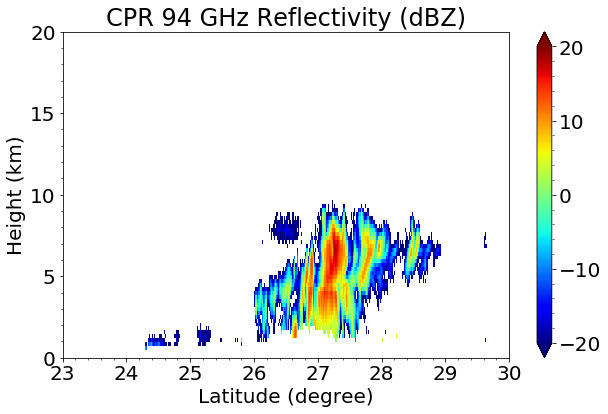

In [12]:
from pyhdf.SD import SD, SDC    # Python interface to the HDF4 library.
from pyhdf.HDF import *
from pyhdf.VS import *
import matplotlib.pyplot as plt # Python 2D plotting library.
import numpy as np              # Computing with Python.
from matplotlib.colors import ListedColormap

# font size
plt.rc('font', size=20)


# Visible Minor thick
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True


# Open hdf file
dir = '/storage1/jhlee/NMSC_2018/Cloudsat/'
#FILE_NAME = dir + '2017307041756_61267_CS_2B-GEOPROF_GRANULE_P_R04_E06.hdf'
FILE_NAME = dir + '2017312043627_61340_CS_2B-GEOPROF_GRANULE_P_R04_E06.hdf'
f = HDF(FILE_NAME, SDC.READ)
vs = f.vstart()


# Read geolocation datasets
vdata_lat = vs.attach('Latitude')
lat = vdata_lat[:]
lat = np.array(lat)
lat = lat[:,0] # Latitude (x-axis)


# Read SDS datasets
hdf = SD(FILE_NAME, SDC.READ)
data1 = hdf.select('Height')
data2 = hdf.select('Radar_Reflectivity')
data3 = hdf.select('CPR_Cloud_mask')
hgt = data1.get() # Height (y-axis)
R   = data2.get() # Reflectivity (output)
clm = data3.get() # CPR cloud mask


# Specific region of CPR 2B-GEOPROF
latmin = 23. ; latmax = 30.
idx = np.where( (lat >= latmin) & (lat <= latmax) )
R = R[idx,:] # Select specific region
R = R[0,:,:]

clm = clm[idx,:]
clm = clm[0,:,:]


# R is Valid values?
R = R.astype(float) # Convert types to float
R[(R <= -4000.) | (R >= 5000.)] = np.nan


# Apply Scale Factor to R
R = R / 100.


# Only first profile's height
hgt = hgt[0,:]
hgt = hgt * 0.001 # m to km


# Cloud mask (>= 30)
clm_threshold = 30.
R[ clm < clm_threshold] = np.nan


# Designed Height area
hgtmin = 0. ; hgtmax = 20.
idx = np.where( (hgt >= hgtmin) & (hgt <= hgtmax) )
R = R[:,idx]
R = R[:,0,:]


# plot CPR map
vmin = -20 ; vmax = 20
plt.figure(figsize=(10,6))


fig = plt.imshow(R.T, cmap = plt.cm.jet, interpolation = 'nearest', \
                 aspect='auto', vmin=vmin, vmax=vmax, extent=[latmin,latmax,hgtmin,hgtmax])
cb = plt.colorbar(fig, ticks = np.arange(vmin,vmax+1,10), extend='both')
cb.minorticks_on() # minor colorbar
plt.xlabel('Latitude (degree)')
plt.ylabel('Height (km)')
plt.yticks(np.arange(hgtmin,hgtmax+1,5))
plt.title('CPR 94 GHz Reflectivity (dBZ)')
plt.savefig('../plots/CPR/CPR_reflectivity_2017312043627.png', dpi=300, \
            bbox_inches='tight', pad_inches=0)
plt.show()